In [1]:
pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Sklearn classifiers
#!pip install sklearn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df_labels= pd.read_csv('glitch_trn_class_labels.csv', names=['d_number','Type'])
df_test= pd.read_csv('glitch_tst_data.csv')
df_train= pd.read_csv('glitch_trn_data.csv')

In [8]:
number_instances, number_features= dataset.shape
number_classes= len(df_labels['Type'].unique())
print(number_instances)
print(number_features)
print(number_classes)

6000
8
22


In [9]:
number_rows,number_columns=df_train.shape
print(number_rows)
print(number_columns)

6000
8


In [3]:
dataset=pd.concat([df_train,df_labels],axis=1)
dataset=dataset.dropna().drop("d_number",axis=1).drop("id",axis=1)
dataset

,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration,Type
0,1129516528,364.822,225.349,35.919,L1,665.643311,0.250,Blip
1,1135647395,3609.954,38.027,2743.555,H1,7209.994629,13.690,Extremely_Loud
2,1129801698,1838.466,2025.310,16.698,H1,3612.932861,0.375,Violin_Mode
3,1131774280,2067.878,111.128,12.727,H1,4067.436523,0.105,Blip
4,1130969087,3978.111,131.921,10.926,L1,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...,...
5995,1137219717,1751.744,1527.022,13.545,L1,1479.296509,0.070,1400Ripples
5996,1135179369,2434.358,10.501,12.226,L1,4856.431641,2.750,Low_Frequency_Burst
5997,1133291354,2081.403,32.397,15.342,H1,4118.316895,2.148,Scattered_Light
5998,1132812651,458.770,402.439,9.298,H1,787.527283,0.039,Blip


In [11]:
df_labels.info

<bound method DataFrame.info of      d_number                 Type
0          d1                 Blip
1          d2       Extremely_Loud
2          d3          Violin_Mode
3          d4                 Blip
4          d5             Scratchy
...       ...                  ...
5995    d5996          1400Ripples
5996    d5997  Low_Frequency_Burst
5997    d5998      Scattered_Light
5998    d5999                 Blip
5999    d6000  Low_Frequency_Burst

[6000 rows x 2 columns]>

In [97]:
df_train.describe()

,GPStime,centralFreq,peakFreq,snr,bandwidth,duration
count,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.131849e+09,1527.440234,204.571435,187.408314,2937.869143,1.779829
std,3.171981e+06,1319.213735,375.027578,1488.282964,2663.562766,2.684282
min,1.126403e+09,9.780000,10.072000,7.501000,1.259180,0.010000
25%,1.128874e+09,256.501000,34.175000,10.360500,425.750580,0.222750
50%,1.132150e+09,1228.915000,111.128000,15.430000,2287.861206,0.767000
75%,1.134567e+09,2627.853750,183.495000,37.026500,5195.882568,2.154500
max,1.137250e+09,4615.132000,2047.106000,81178.727000,7946.482910,42.156000


In [99]:
df_test.describe()

,GPStime,centralFreq,peakFreq,snr,bandwidth,duration
count,6.670000e+02,667.000000,667.000000,667.000000,667.000000,667.000000
mean,1.132059e+09,1546.565111,200.102450,234.753298,2970.032788,1.777586
std,3.104087e+06,1331.672065,369.514757,2312.680482,2670.787464,2.565614
min,1.126403e+09,10.373000,10.072000,7.513000,1.525630,0.007000
25%,1.129193e+09,240.193000,34.808000,10.030000,371.381851,0.246000
50%,1.132613e+09,1248.083000,102.199000,15.224000,2361.463379,0.752000
75%,1.134774e+09,2693.702000,190.191500,36.232500,5270.245117,2.125000
max,1.137238e+09,4460.082000,2025.310000,57284.523000,7946.482910,18.023000


In [12]:
df_train.isnull().sum()

id             0
GPStime        0
centralFreq    0
peakFreq       0
snr            0
ifo            0
bandwidth      0
duration       0
dtype: int64

In [13]:
df_test.isnull().sum()

id             0
GPStime        0
centralFreq    0
peakFreq       0
snr            0
ifo            0
bandwidth      0
duration       0
dtype: int64

In [14]:
import warnings
warnings.filterwarnings('ignore')

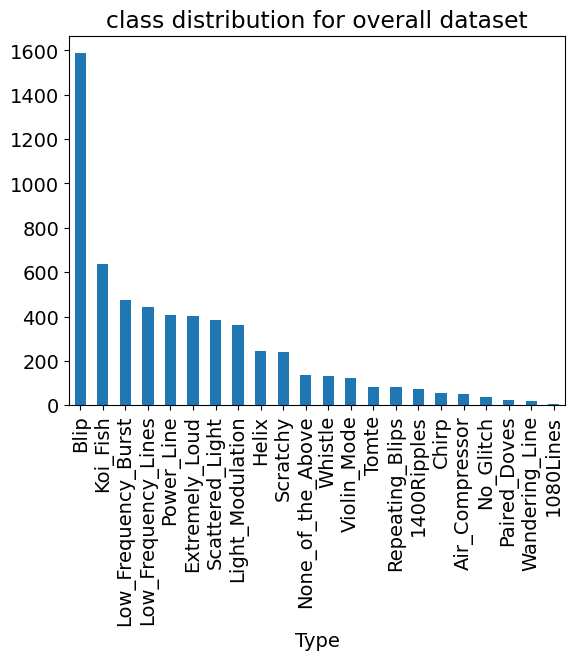

In [15]:
from matplotlib import pyplot as plt
dataset['Type'].value_counts().plot(kind='bar',title="class distribution for overall dataset")
plt.xticks(rotation=90)
# Display the plot
plt.show()

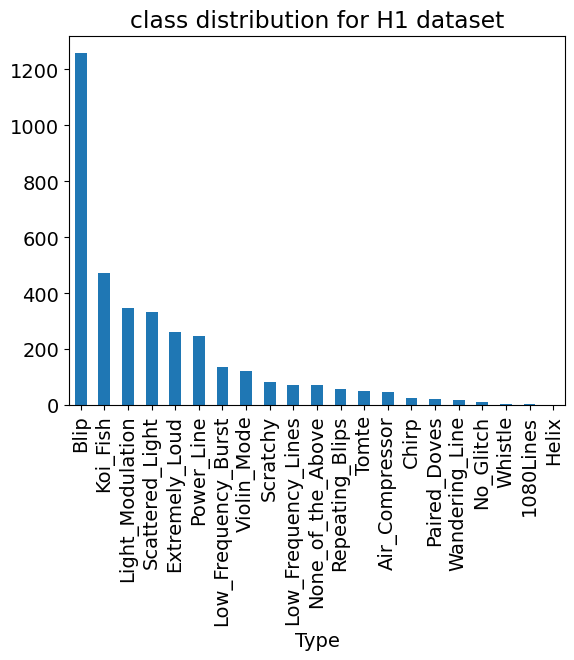

In [16]:
from matplotlib import pyplot as plt
dataset_only_L1=dataset[dataset['ifo']=='H1']
dataset_only_L1['Type'].value_counts().plot(kind='bar',title="class distribution for H1 dataset")
plt.xticks(rotation=90)
# Display the plot
plt.show()

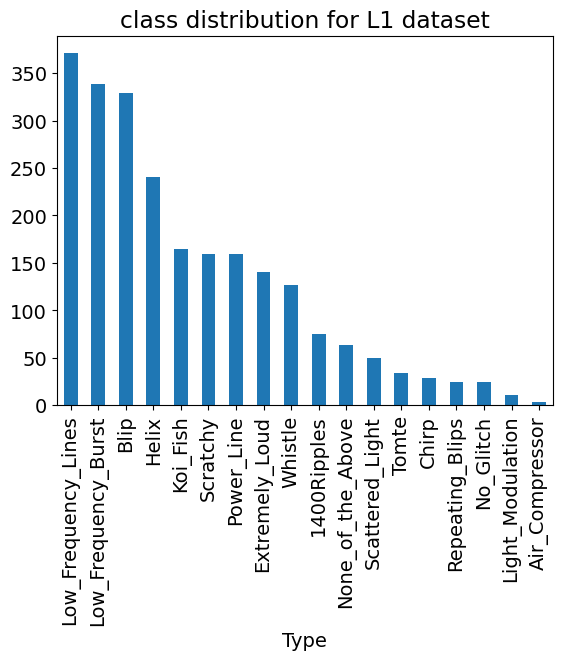

In [17]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
dataset_only_L1=dataset[dataset['ifo']=='L1']
dataset_only_L1['Type'].value_counts().plot(kind='bar', title="class distribution for L1 dataset")
plt.xticks(rotation=90)
# Display the plot
plt.show()

In [19]:
#@title check scores after running gridsearch and removing ifo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm

df1=dataset.drop("ifo",axis=1)
X = df1.drop("Type",axis=1)
y = df1["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [13, 15, 12, None],
            'min_samples_split': [2, 3, 1]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [90, 110, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [15, 20, 25, None],
            'min_samples_split': [2, 3, 1]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 500, 500]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [3, 6, 7, 8],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }

    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters for {type(model).__name__}: {grid_search.best_params_}")
    
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6954927992164012 and Recall: 0.6959068333094973. Thus the F-measure for the particular model is: 0.6889613835029051
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6885890541431618 and Recall: 0.6988849491204608. Thus the F-measure for the particular model is: 0.68706184307284

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8420551313679302 and Recall: 0.7591538960942958. Thus the F-measure for the particular model is: 0.7829232046584088
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best hyperparameters for RandomForestClassifier: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 90}
After gridsearch, The best Model is: Ra

In [20]:
df1

,GPStime,centralFreq,peakFreq,snr,bandwidth,duration,Type
0,1129516528,364.822,225.349,35.919,665.643311,0.250,Blip
1,1135647395,3609.954,38.027,2743.555,7209.994629,13.690,Extremely_Loud
2,1129801698,1838.466,2025.310,16.698,3612.932861,0.375,Violin_Mode
3,1131774280,2067.878,111.128,12.727,4067.436523,0.105,Blip
4,1130969087,3978.111,131.921,10.926,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...
5995,1137219717,1751.744,1527.022,13.545,1479.296509,0.070,1400Ripples
5996,1135179369,2434.358,10.501,12.226,4856.431641,2.750,Low_Frequency_Burst
5997,1133291354,2081.403,32.397,15.342,4118.316895,2.148,Scattered_Light
5998,1132812651,458.770,402.439,9.298,787.527283,0.039,Blip


In [21]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# FOR TRAINING DATASET

In [41]:
#@title onehot encoding
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='ifo',use_cat_names=True)

df2 = dataset.copy()  

# Apply one-hot encoding
df2encoded = encoder.fit_transform(df2)

print("Original DataFrame:")
print(df2.head())

print("\nEncoded DataFrame:")
df2encoded

Original DataFrame:
      GPStime  centralFreq  peakFreq       snr ifo    bandwidth  duration  \
0  1129516528      364.822   225.349    35.919  L1   665.643311     0.250   
1  1135647395     3609.954    38.027  2743.555  H1  7209.994629    13.690   
2  1129801698     1838.466  2025.310    16.698  H1  3612.932861     0.375   
3  1131774280     2067.878   111.128    12.727  H1  4067.436523     0.105   
4  1130969087     3978.111   131.921    10.926  L1  7795.106934     2.304   

             Type  
0            Blip  
1  Extremely_Loud  
2     Violin_Mode  
3            Blip  
4        Scratchy  

Encoded DataFrame:


,GPStime,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,bandwidth,duration,Type
0,1129516528,364.822,225.349,35.919,1,0,665.643311,0.250,Blip
1,1135647395,3609.954,38.027,2743.555,0,1,7209.994629,13.690,Extremely_Loud
2,1129801698,1838.466,2025.310,16.698,0,1,3612.932861,0.375,Violin_Mode
3,1131774280,2067.878,111.128,12.727,0,1,4067.436523,0.105,Blip
4,1130969087,3978.111,131.921,10.926,1,0,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...,...,...
5995,1137219717,1751.744,1527.022,13.545,1,0,1479.296509,0.070,1400Ripples
5996,1135179369,2434.358,10.501,12.226,1,0,4856.431641,2.750,Low_Frequency_Burst
5997,1133291354,2081.403,32.397,15.342,0,1,4118.316895,2.148,Scattered_Light
5998,1132812651,458.770,402.439,9.298,0,1,787.527283,0.039,Blip


# FOR THE TEST DATASET

In [42]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='ifo',use_cat_names=True)

df2_test = df_test.copy()  

# Apply one-hot encoding
df2encoded_test = encoder.fit_transform(df2)

print("Original DataFrame:")
print(df2_test.head())

print("\nEncoded DataFrame:")
print(df2encoded_test)

Original DataFrame:
           id       GPStime  centralFreq  peakFreq     snr ifo    bandwidth  \
0  YVnrMXRcUP  1.132261e+09     2960.810    38.027  63.400  H1  5902.753418   
1  qD8uxo1Jeu  1.132725e+09     1119.993   324.754  11.789  H1  2135.070557   
2  Z5grpD4TOG  1.128422e+09      236.863   134.965   8.000  L1   211.306503   
3  4TskgvMLa2  1.132886e+09     1905.332   137.711  14.362  H1  3742.343506   
4  ZMEZmAs4gO  1.132755e+09     1119.433   170.654   9.087  H1  2174.645996   

   duration  
0     2.000  
1     0.070  
2     0.047  
3     0.125  
4     0.230  

Encoded DataFrame:
         GPStime  centralFreq  peakFreq       snr  ifo_L1  ifo_H1  \
0     1129516528      364.822   225.349    35.919       1       0   
1     1135647395     3609.954    38.027  2743.555       0       1   
2     1129801698     1838.466  2025.310    16.698       0       1   
3     1131774280     2067.878   111.128    12.727       0       1   
4     1130969087     3978.111   131.921    10.926       

# GRIDSEARCH AFTER ONE HOT ENCODING

In [24]:
#@title check scores after running gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X = df2encoded.drop(["Type","GPStime"],axis=1)
y = df2encoded["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [110,120,130],
            'criterion': ['gini', 'entropy'],
            'max_depth': [19,20, 22, 24,None],
            'min_samples_split': [2, 3, 5]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [90,100,110],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 200, 100]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [5, 6, 7, 8],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    
    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters for {type(model).__name__} are : {grid_search.best_params_}")
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6731447509997572 and Recall: 0.6762357589061808. Thus the F-measure for the particular model is: 0.6720707191034093
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Best hyperparameters for DecisionTreeClassifier are : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.7012769326985642 and Recall: 0.7150023888207119. Thus the F-measure for the particular model is: 0.7037781947944012

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8294672180806753 and Recall: 0.7513035206961299. Thus the F-measure for the particular model is: 0.768357957043424
Fitting 4 folds for each of 90 candidates, totalling 360 fits
Best hyperparameters for RandomForestClassifier are : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 120}
After gridsearch, The best Mod

# NOW NORMALIZING THE DATASET WITHOUT USING IFO

In [25]:
#@title normalization routine
train_stats= dataset.describe()
train_stats=train_stats.transpose()
train_stats

def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

df3=dataset.drop("ifo",axis=1)
df3normed=norm(df3.drop("Type",axis=1))
df3normed["Type"]=dataset["Type"]
print(df3normed)

       GPStime  centralFreq  peakFreq       snr  bandwidth  duration  \
0    -0.735491    -0.881296  0.055403 -0.101788  -0.853078 -0.569921   
1     1.197329     1.578602 -0.444086  1.717514   1.603914  4.437004   
2    -0.645588     0.235766  4.854946 -0.114703   0.253444 -0.523354   
3    -0.023711     0.409667 -0.249164 -0.117371   0.424081 -0.623939   
4    -0.277556     1.857675 -0.193720 -0.118581   1.823587  0.195274   
...        ...          ...       ...       ...        ...       ...   
5995  1.693019     0.170028  3.526276 -0.116821  -0.547602 -0.636978   
5996  1.049779     0.687468 -0.517483 -0.117708   0.720299  0.361427   
5997  0.454562     0.419919 -0.459098 -0.115614   0.443184  0.137158   
5998  0.303646    -0.810081  0.527608 -0.119675  -0.807318 -0.648527   
5999  1.507794     1.085843 -0.508772 -0.115819   1.113811  0.454561   

                     Type  
0                    Blip  
1          Extremely_Loud  
2             Violin_Mode  
3                    Bl

In [26]:
#@title check scores after gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X = df3normed.drop("Type",axis=1)
y = df3normed["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [13, 15, 12, None],
            'min_samples_split': [2, 3, 1]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [90, 110, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [15, 20, 25, None],
            'min_samples_split': [2, 3, 1]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 250, 500]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [3, 6, 7, 8],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    
    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"The Best hyperparameters for {type(model).__name__} are: {grid_search.best_params_}")
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6961818972472344 and Recall: 0.7006144169276104. Thus the F-measure for the particular model is: 0.6919443171046744
Fitting 4 folds for each of 24 candidates, totalling 96 fits


The Best hyperparameters for DecisionTreeClassifier are: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6889347389816792 and Recall: 0.6988849491204608. Thus the F-measure for the particular model is: 0.6871950807859121

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8415828116910157 and Recall: 0.7685312711849194. Thus the F-measure for the particular model is: 0.7895454538564928
Fitting 4 folds for each of 72 candidates, totalling 288 fits
The Best hyperparameters for RandomForestClassifier are: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 3, 'n_estimators': 110}
After gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8255030125757408 and Recall: 0.7740349412197172. Thus the F-measure for the particular model is: 0.7857660071911898

Before gridsearch, The best Model is: KNeighborsClassifier, with Precision: 0.603

# DROPPING BANDWIDTH FEATURE AND THEN NORMALIZING IT

In [27]:
#@title normalization routine
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='ifo',use_cat_names=True)
df4=dataset
df4encoded=encoder.fit_transform(df4)

train_stats= df4encoded.describe()
train_stats=train_stats.transpose()
train_stats

def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

df4normed=norm(df4encoded.drop("Type",axis=1))
df4normed["Type"]=dataset["Type"]

In [77]:
df4normed

,GPStime,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,bandwidth,duration,Type
0,-0.735491,-0.881296,0.055403,-0.101788,1.248786,-1.248786,-0.853078,-0.569921,Blip
1,1.197329,1.578602,-0.444086,1.717514,-0.800644,0.800644,1.603914,4.437004,Extremely_Loud
2,-0.645588,0.235766,4.854946,-0.114703,-0.800644,0.800644,0.253444,-0.523354,Violin_Mode
3,-0.023711,0.409667,-0.249164,-0.117371,-0.800644,0.800644,0.424081,-0.623939,Blip
4,-0.277556,1.857675,-0.193720,-0.118581,1.248786,-1.248786,1.823587,0.195274,Scratchy
...,...,...,...,...,...,...,...,...,...
5995,1.693019,0.170028,3.526276,-0.116821,1.248786,-1.248786,-0.547602,-0.636978,1400Ripples
5996,1.049779,0.687468,-0.517483,-0.117708,1.248786,-1.248786,0.720299,0.361427,Low_Frequency_Burst
5997,0.454562,0.419919,-0.459098,-0.115614,-0.800644,0.800644,0.443184,0.137158,Scattered_Light
5998,0.303646,-0.810081,0.527608,-0.119675,-0.800644,0.800644,-0.807318,-0.648527,Blip


# RUNNING THE GRIDSEARCH FOR THE SAME

In [78]:
#@title check scores after gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

df4normed_bandwidth=df4normed.drop("bandwidth",axis=1)
X = df4normed_bandwidth.drop("Type",axis=1)
y = df4normed["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 500, 1000]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    
    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters for {type(model).__name__} are: {grid_search.best_params_}")
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.7001334973430999 and Recall: 0.7113928083447116. Thus the F-measure for the particular model is: 0.7037102247733159
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters for DecisionTreeClassifier are: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6917491652004182 and Recall: 0.718052713129559. Thus the F-measure for the particular model is: 0.7011014625114378

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.849372821659668 and Recall: 0.7780821178571639. Thus the F-measure for the particular model is: 0.7977187705482794
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best hyperparameters for RandomForestClassifier are: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
After gridsearch, The best Model is

# Dropping centralFreq for the normalized dataset

In [32]:
#@title check scores after gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

df4normed_bandwidth=df4normed.drop("centralFreq",axis=1)
X = df4normed_bandwidth.drop("Type",axis=1)
y = df4normed["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 500, 1000]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    
    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters for {type(model).__name__} are: {grid_search.best_params_}")
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.7003482631110112 and Recall: 0.7094136903799226. Thus the F-measure for the particular model is: 0.702655781605664
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters for DecisionTreeClassifier are: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.702634869561594 and Recall: 0.7234740238947812. Thus the F-measure for the particular model is: 0.7093885461382049

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8673112412950265 and Recall: 0.7802071243519041. Thus the F-measure for the particular model is: 0.8025241132255679
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best hyperparameters for RandomForestClassifier are: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
After gridsearch, The best M

# CORRELATION MATRIX

In [28]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


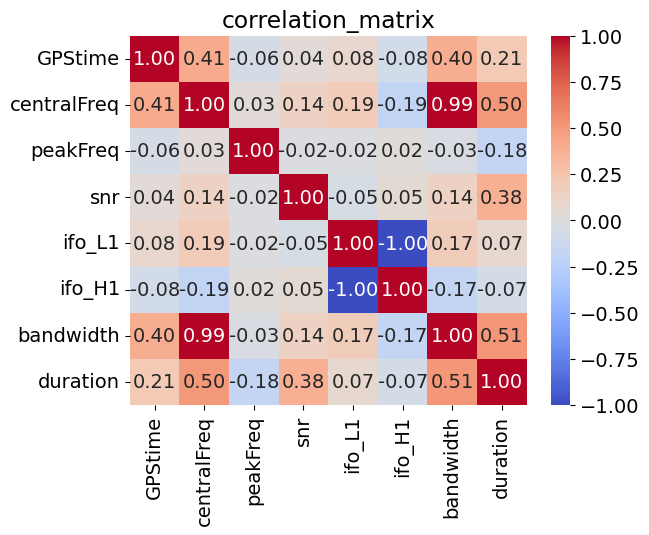

In [29]:
import seaborn as sns
dfencoded_type=df2encoded.drop("Type",axis=1)
df_corr=pd.DataFrame(dfencoded_type)
correlation_matrix= df_corr.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation_matrix')
plt.show()

# Now we can remove ANY one feature between bandwidth and central frequency and find how the model works.
# We will remove bandwidth first and then central freq.

In [43]:
df2encoded

,GPStime,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,bandwidth,duration,Type
0,1129516528,364.822,225.349,35.919,1,0,665.643311,0.250,Blip
1,1135647395,3609.954,38.027,2743.555,0,1,7209.994629,13.690,Extremely_Loud
2,1129801698,1838.466,2025.310,16.698,0,1,3612.932861,0.375,Violin_Mode
3,1131774280,2067.878,111.128,12.727,0,1,4067.436523,0.105,Blip
4,1130969087,3978.111,131.921,10.926,1,0,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...,...,...
5995,1137219717,1751.744,1527.022,13.545,1,0,1479.296509,0.070,1400Ripples
5996,1135179369,2434.358,10.501,12.226,1,0,4856.431641,2.750,Low_Frequency_Burst
5997,1133291354,2081.403,32.397,15.342,0,1,4118.316895,2.148,Scattered_Light
5998,1132812651,458.770,402.439,9.298,0,1,787.527283,0.039,Blip


In [30]:
#@title check scores after gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X = dfencoded_type.drop("bandwidth",axis=1)
y = df2encoded["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [13, 15, 12, None],
            'min_samples_split': [2, 3, 1]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [90, 110, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [22, 20, 24, None],
            'min_samples_split': [2, 3, 4]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 500, 250]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [3, 6, 7, 8],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    
    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters for {type(model).__name__} are: {grid_search.best_params_}")
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.7058677289457254 and Recall: 0.7166319955351615. Thus the F-measure for the particular model is: 0.7096273114627375
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters for DecisionTreeClassifier are: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 3}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.718616364803161 and Recall: 0.7081134676312147. Thus the F-measure for the particular model is: 0.7087562087468176

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8573629343279741 and Recall: 0.7828447417317005. Thus the F-measure for the particular model is: 0.8040198777094996
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best hyperparameters for RandomForestClassifier are: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 3, 'n_estimators': 110}
After gridsearch, The best Model i

# REMOVING CENTRAL FREQUENCY

In [31]:
#@title check scores after gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X = dfencoded_type.drop("centralFreq",axis=1)
y = df2encoded["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)

models = [
    DecisionTreeClassifier(random_state=50),
    RandomForestClassifier(random_state=50),
    KNeighborsClassifier(),
    linear_model.LogisticRegression(random_state=50,multi_class='multinomial')
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Before gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    param_grid = {}
    if type(model).__name__ == 'DecisionTreeClassifier':
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [13, 15, 12, None],
            'min_samples_split': [2, 3, 1]
        }
    elif type(model).__name__ == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [90, 110, 120],
            'criterion': ['gini', 'entropy'],
            'max_depth': [15, 20, 25, None],
            'min_samples_split': [2, 3, 4]
        }
    elif type(model).__name__ == 'LogisticRegression':
        param_grid = {
            'C': [1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 500, 250]
        }
    elif type(model).__name__ == 'KNeighborsClassifier':
        param_grid = {
            'n_neighbors': [3, 6, 7, 8],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    
    grid_search = GridSearchCV(model, param_grid, cv=4,verbose=1,n_jobs=-1,scoring=scoring, refit='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters for {type(model).__name__} are: {grid_search.best_params_}")
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'After gridsearch, The best Model is: {type(model).__name__}, with Precision: {precision} and Recall: {recall}. Thus the F-measure for the particular model is: {f_measure}')
    print()

Before gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6996608201061973 and Recall: 0.7103196333108935. Thus the F-measure for the particular model is: 0.7034980727572343
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters for DecisionTreeClassifier are: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2}
After gridsearch, The best Model is: DecisionTreeClassifier, with Precision: 0.6973420044411667 and Recall: 0.7209997344113066. Thus the F-measure for the particular model is: 0.7035878742718608

Before gridsearch, The best Model is: RandomForestClassifier, with Precision: 0.8645108879564741 and Recall: 0.7843904029524968. Thus the F-measure for the particular model is: 0.8041163288831078
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best hyperparameters for RandomForestClassifier are: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 110}
After gridsearch, The best Mod

# ADABOOST

In [56]:
#@title onehot encoding
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='ifo',use_cat_names=True)

df2 = dataset.copy()  

# Apply one-hot encoding
df2encoded1 = encoder.fit_transform(df2)

# df_new=df2encoded1.drop("id",axis=1)
df_new=df2encoded1.drop("GPStime",axis=1)
# df3=df2encoded.drop("id",axis=1)
df_new

,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,bandwidth,duration,Type
0,364.822,225.349,35.919,1,0,665.643311,0.250,Blip
1,3609.954,38.027,2743.555,0,1,7209.994629,13.690,Extremely_Loud
2,1838.466,2025.310,16.698,0,1,3612.932861,0.375,Violin_Mode
3,2067.878,111.128,12.727,0,1,4067.436523,0.105,Blip
4,3978.111,131.921,10.926,1,0,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...,...
5995,1751.744,1527.022,13.545,1,0,1479.296509,0.070,1400Ripples
5996,2434.358,10.501,12.226,1,0,4856.431641,2.750,Low_Frequency_Burst
5997,2081.403,32.397,15.342,0,1,4118.316895,2.148,Scattered_Light
5998,458.770,402.439,9.298,0,1,787.527283,0.039,Blip


In [57]:
X = df_new.drop(["Type","bandwidth"],axis=1)

y = df_new["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [60]:
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_split=2)
dt_adaboost = AdaBoostClassifier(dt_classifier, n_estimators=50, random_state=42)
dt_adaboost.fit(X_train, y_train)
y_dt_pred = dt_adaboost.predict(X_test)
precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_dt_pred, average='macro')
print(f'After Adaboost Model on decision tree: | Precision: {precision} | Recall: {recall} | F-measure: {f_measure}\n')


After Adaboost Model on decision tree: | Precision: 0.6935384527564156 | Recall: 0.7013263839248137 | F-measure: 0.691993472601506



In [58]:
rf_classifier = RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_split= 2, n_estimators= 100,random_state=50)
rf_adaboost = AdaBoostClassifier(rf_classifier, n_estimators=50, random_state=42)
rf_adaboost.fit(X_train, y_train)
y_rf_pred = rf_adaboost.predict(X_test)

precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_rf_pred, average='macro')
print(f'After Adaboost Model on random forest: | Precision: {precision} | Recall: {recall} | F-measure: {f_measure}\n')


After Adaboost Model on random forest: | Precision: 0.7956800021268222 | Recall: 0.7366384066761201 | F-measure: 0.7491311441387963



# I have now used the SVM classifier for my dataset.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X = dfencoded_type.drop("bandwidth",axis=1)
y = df2encoded["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=50)

clf = SVC(class_weight='balanced',probability=True)  
clf_parameters = {'C':[50,100,150],
'kernel':['rbf','sigmoid','linear']}
grid_search = GridSearchCV(clf, clf_parameters, scoring='f1_macro',cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(f"Best hyperparameters for {type(model).__name__}: {grid_search.best_params_}")
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'After gridsearch Model: {type(model).__name__} | Precision: {precision} | Recall: {recall} | F-measure: {f_measure}\n')

c:\Users\Vijay Sarathi.R.S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters for SVC: {'C': 100, 'kernel': 'rbf'}
After gridsearch Model: SVC | Precision: 0.009807349935358993 | Recall: 0.10468904033260468 | F-measure: 0.013901373152145574



c:\Users\Vijay Sarathi.R.S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.model_selection import train_test_split
X = dfencoded_type.drop("bandwidth",axis=1)
y = df2encoded["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)

# ENCODING THE TEST DATASET AND BECAUSE OF SOME ISSUE IN THE DATASET WE HAVE TO EXCHANGE THE NAME OF THE FEATURES IFO_L1 TO IFO_H1 AND VICE VERSA.

In [34]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='ifo',use_cat_names=True)

df2 = df_test.copy()  

# Apply one-hot encoding
df2encoded = encoder.fit_transform(df2)

print("Original DataFrame:")
print(df2.head())

print("\nEncoded DataFrame:")
# print(df2encoded.head())

temp_column = df2encoded['ifo_H1'].copy()  
df2encoded['ifo_H1'] = df2encoded['ifo_L1']  
df2encoded['ifo_L1'] = temp_column

df2encoded = df2encoded.rename(columns={'ifo_H1': 'ifo_L1','ifo_L1': 'ifo_H1'})
# df2encoded = df2encoded.rename(columns={'ifo_L1': 'ifo_H1'})

print(df2encoded)

Original DataFrame:
           id       GPStime  centralFreq  peakFreq     snr ifo    bandwidth  \
0  YVnrMXRcUP  1.132261e+09     2960.810    38.027  63.400  H1  5902.753418   
1  qD8uxo1Jeu  1.132725e+09     1119.993   324.754  11.789  H1  2135.070557   
2  Z5grpD4TOG  1.128422e+09      236.863   134.965   8.000  L1   211.306503   
3  4TskgvMLa2  1.132886e+09     1905.332   137.711  14.362  H1  3742.343506   
4  ZMEZmAs4gO  1.132755e+09     1119.433   170.654   9.087  H1  2174.645996   

   duration  
0     2.000  
1     0.070  
2     0.047  
3     0.125  
4     0.230  

Encoded DataFrame:
             id       GPStime  centralFreq  peakFreq     snr  ifo_L1  ifo_H1  \
0    YVnrMXRcUP  1.132261e+09     2960.810    38.027  63.400       0       1   
1    qD8uxo1Jeu  1.132725e+09     1119.993   324.754  11.789       0       1   
2    Z5grpD4TOG  1.128422e+09      236.863   134.965   8.000       1       0   
3    4TskgvMLa2  1.132886e+09     1905.332   137.711  14.362       0       1   
4

In [35]:
df3=df2encoded.drop("id",axis=1)
df31=df3.drop("GPStime",axis=1)
df3=df31.drop("bandwidth",axis=1)
# df3=df2encoded.drop("id",axis=1)
print(X_test)
df3.head()

         GPStime  centralFreq  peakFreq     snr  ifo_L1  ifo_H1  duration
2728  1134494283     2656.213    22.688  14.781       0       1     2.250
4026  1133787670     2376.033    11.327   7.526       1       0     1.500
4923  1132934798     3424.924    48.883   8.248       0       1     1.250
3918  1133608430      544.880   111.128  22.749       0       1     0.375
431   1134917870     3736.258   137.711   8.933       1       0     2.578
...          ...          ...       ...     ...     ...     ...       ...
2596  1127748035      247.280   121.663  54.793       0       1     0.688
5127  1127494766      182.983    99.067   8.800       0       1     0.281
4112  1131635849     3945.075    89.676  98.058       1       0     1.796
2943  1135803710      549.402   324.754  13.082       0       1     0.188
4994  1129612025     1521.968   512.608  53.910       0       1     1.000

[1500 rows x 7 columns]


,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,duration
0,2960.810,38.027,63.400,0,1,2.000
1,1119.993,324.754,11.789,0,1,0.070
2,236.863,134.965,8.000,1,0,0.047
3,1905.332,137.711,14.362,0,1,0.125
4,1119.433,170.654,9.087,0,1,0.230


In [61]:
#@title onehot encoding
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='ifo',use_cat_names=True)

df2 = dataset.copy()  

# Apply one-hot encoding
df2encoded1 = encoder.fit_transform(df2)

print("Original DataFrame:")
print(df2.head())

print("\nEncoded DataFrame:")
print(df2encoded1.head())

# df_new=df2encoded1.drop("id",axis=1)
df_new=df2encoded1.drop("GPStime",axis=1)
# df3=df2encoded.drop("id",axis=1)
df_new

Original DataFrame:
      GPStime  centralFreq  peakFreq       snr ifo    bandwidth  duration  \
0  1129516528      364.822   225.349    35.919  L1   665.643311     0.250   
1  1135647395     3609.954    38.027  2743.555  H1  7209.994629    13.690   
2  1129801698     1838.466  2025.310    16.698  H1  3612.932861     0.375   
3  1131774280     2067.878   111.128    12.727  H1  4067.436523     0.105   
4  1130969087     3978.111   131.921    10.926  L1  7795.106934     2.304   

             Type  
0            Blip  
1  Extremely_Loud  
2     Violin_Mode  
3            Blip  
4        Scratchy  

Encoded DataFrame:
      GPStime  centralFreq  peakFreq       snr  ifo_L1  ifo_H1    bandwidth  \
0  1129516528      364.822   225.349    35.919       1       0   665.643311   
1  1135647395     3609.954    38.027  2743.555       0       1  7209.994629   
2  1129801698     1838.466  2025.310    16.698       0       1  3612.932861   
3  1131774280     2067.878   111.128    12.727       0       

,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,bandwidth,duration,Type
0,364.822,225.349,35.919,1,0,665.643311,0.250,Blip
1,3609.954,38.027,2743.555,0,1,7209.994629,13.690,Extremely_Loud
2,1838.466,2025.310,16.698,0,1,3612.932861,0.375,Violin_Mode
3,2067.878,111.128,12.727,0,1,4067.436523,0.105,Blip
4,3978.111,131.921,10.926,1,0,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...,...
5995,1751.744,1527.022,13.545,1,0,1479.296509,0.070,1400Ripples
5996,2434.358,10.501,12.226,1,0,4856.431641,2.750,Low_Frequency_Burst
5997,2081.403,32.397,15.342,0,1,4118.316895,2.148,Scattered_Light
5998,458.770,402.439,9.298,0,1,787.527283,0.039,Blip


In [37]:
glitch="1080Lines,1400Ripples,Air_Compressor,Blip,Chirp,Extremely_Loud,Helix,Koi_Fish,Light_Modulation,Low_Frequency_Burst,Low_Frequency_Lines,No_Glitch,None_of_the_Above,Paired_Doves,Power_Line,Repeating_Blips,Scattered_Light,Scratchy,Tomte,Violin_Mode,Wandering_Line,Whistle"
array_of_glitchs=glitch.split(",")

In [38]:
array_of_glitchs

['1080Lines',
 '1400Ripples',
 'Air_Compressor',
 'Blip',
 'Chirp',
 'Extremely_Loud',
 'Helix',
 'Koi_Fish',
 'Light_Modulation',
 'Low_Frequency_Burst',
 'Low_Frequency_Lines',
 'No_Glitch',
 'None_of_the_Above',
 'Paired_Doves',
 'Power_Line',
 'Repeating_Blips',
 'Scattered_Light',
 'Scratchy',
 'Tomte',
 'Violin_Mode',
 'Wandering_Line',
 'Whistle']

#### FOR OTHER CLASSIFIER WE CAN SEE THAT THE F1 MEASURE IS VERY LOW AS COMPARED TO THE RANDOM FOREST CLASSIFIER 


#### AND THUS RUNNING THOSE CLASSIFIER WON'T MAKE MUCH DIFFERENCE
#### AND THAT IS THE REASON I HAVE USED RANDOM FOREST CLASSFIER ON AND THEN I HAVE DROPPED CENTRALFREQ AND BANDWIDTH TO KNOW IN WHICH, THE MODEL RUNS THE BEST.

Dropping Central Freq and doing the classifier

In [91]:
df2encoded

,GPStime,centralFreq,peakFreq,snr,ifo_L1,ifo_H1,bandwidth,duration,Type
0,1129516528,364.822,225.349,35.919,1,0,665.643311,0.250,Blip
1,1135647395,3609.954,38.027,2743.555,0,1,7209.994629,13.690,Extremely_Loud
2,1129801698,1838.466,2025.310,16.698,0,1,3612.932861,0.375,Violin_Mode
3,1131774280,2067.878,111.128,12.727,0,1,4067.436523,0.105,Blip
4,1130969087,3978.111,131.921,10.926,1,0,7795.106934,2.304,Scratchy
...,...,...,...,...,...,...,...,...,...
5995,1137219717,1751.744,1527.022,13.545,1,0,1479.296509,0.070,1400Ripples
5996,1135179369,2434.358,10.501,12.226,1,0,4856.431641,2.750,Low_Frequency_Burst
5997,1133291354,2081.403,32.397,15.342,0,1,4118.316895,2.148,Scattered_Light
5998,1132812651,458.770,402.439,9.298,0,1,787.527283,0.039,Blip


Precision: 0.80642360513244 | Recall: 0.7497275677126027 | F-measure: 0.762101627043902



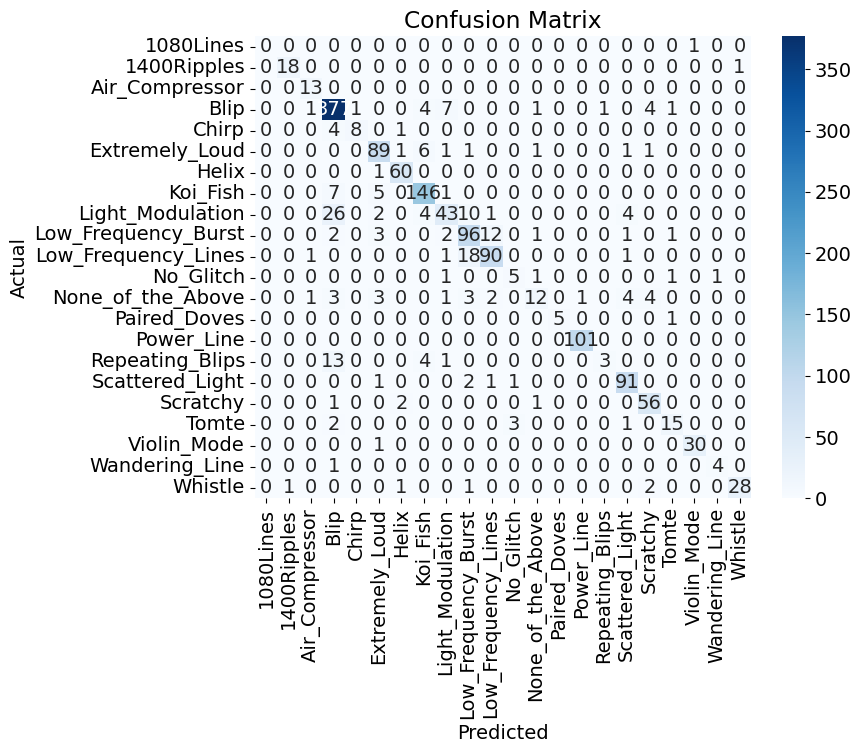

<Figure size 640x480 with 0 Axes>

In [92]:
#Dropping centralfreq RandomForestClassifier
# df_new1=df_new.drop("centralFreq",axis=1)

X=df2encoded.drop(["Type","centralFreq","GPStime"],axis=1)
y=df2encoded['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)
# {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 3, n_estimators= 130,random_state=50) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'Precision: {precision} | Recall: {recall} | F-measure: {f_measure}\n')

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=array_of_glitchs, yticklabels=array_of_glitchs)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig("confusion matrix centralfreq.png")

# Dropping bandwidth and doing the classifier

Precision: 0.8223524165429879 | Recall: 0.74755467708745 | F-measure: 0.7625581943954447



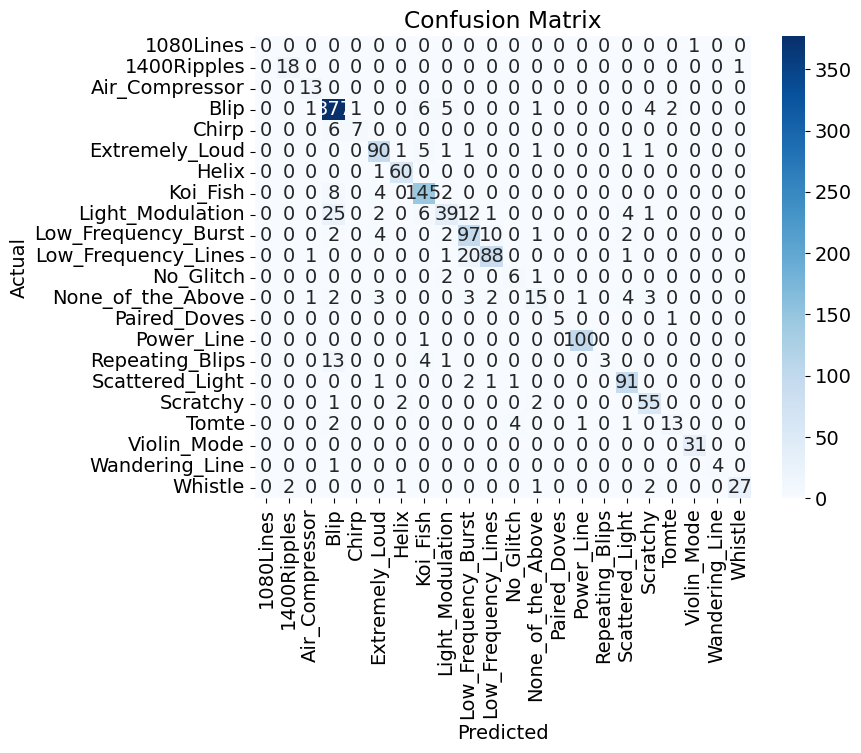

<Figure size 640x480 with 0 Axes>

In [93]:
# df_new1=df_new.drop("bandwidth",axis=1)

X=df2encoded.drop(["Type","bandwidth","GPStime"],axis=1)
y=df2encoded['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)

# Train Decision Tree Classifier
# {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
rfc = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_split=3, n_estimators=130, random_state=50)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

precision, recall, f_measure, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'Precision: {precision} | Recall: {recall} | F-measure: {f_measure}\n')

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=array_of_glitchs, yticklabels=array_of_glitchs)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig("confusion matrix.png")

In [94]:
predictions = rfc.predict(df3)
test_ids= df_test['id']
# Create results DataFrame
results_df = pd.DataFrame({'predicted_class': predictions})


In [95]:
results_df.head(100)

,id,predicted_class
0,YVnrMXRcUP,Koi_Fish
1,qD8uxo1Jeu,Blip
2,Z5grpD4TOG,Helix
3,4TskgvMLa2,Blip
4,ZMEZmAs4gO,Scratchy
...,...,...
95,mqzze2HIi4,Power_Line
96,i0xCA0weGF,Scattered_Light
97,qtD0srbEhR,Low_Frequency_Lines
98,dXjtH7mau8,Violin_Mode


predicted_class
Blip                   187
Koi_Fish                78
Low_Frequency_Burst     63
Low_Frequency_Lines     48
Power_Line              46
Extremely_Loud          42
Scattered_Light         42
Scratchy                31
Light_Modulation        31
Helix                   29
Whistle                 14
Violin_Mode             14
Tomte                   10
None_of_the_Above        9
1400Ripples              7
Air_Compressor           6
Paired_Doves             3
No_Glitch                3
Chirp                    3
Wandering_Line           1
Name: count, dtype: int64

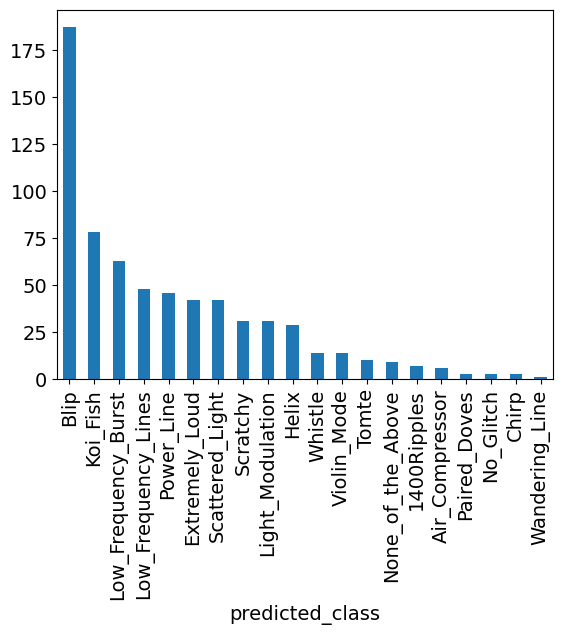

In [96]:
results_df.to_csv('my_dataframe.csv',index=False)
results_df["predicted_class"].value_counts().plot(kind="bar")
plt.savefig("glitch distribution test result.png", bbox_inches='tight', facecolor='w')
results_df["predicted_class"].value_counts()